# Capstone Project - Loan Classification

## Background
Peer to peer lending, or P2P lending, has been around for more than a decade. Loans are made out to a variety of borrowers by individuals through online platforms. It has seen a huge surge in take-ups in the past years, as P2P lending bloomed into a multi-billion industry. Such form of lending removes the traditional players, which are the banks, from equation. In Singapore, there are platforms such as:

* CoAssets
* Minterest
* Seedin
* Funding Societies
* Capital Match
* Moolah Sense
* Validus

P2P lending is considered a high risk product due to the lack of regulation and enforcement. Individual investors might not comprehend the level of risk entered when lending out to the loanees. This can be seen from the reviews of the various platforms.
    
<img src="../images/Capital Match Google reviews.png">
<img src="../images/CoAssets Google reviews.png">
<img src="../images/Funding Societies Google reviews.png">
<img src="../images/Minterest Google reviews.png">
<img src="../images/MoolahSense Google reviews.png">


## Problem Statement

The problem of investors making loans out to borrowers beyond their risk appetite, puts the investors at risk of not recouping their funds, which discourages investors from disbursing loans and causes genuine good borrowers from obtaining the necessary funds, so a good starting point would be to have tool assess and classify loans according to risk levels.

The objective is to build a model that classifies and predicts whether the loan will be paid back and investors are able to use it to decide on making out the loan to the borrower.

## Executive Summary

#### Context and Motivation
P2P lending has seen a boom in the past decade or so. It basically connects individual lenders with spectrum of borrowers, with the lenders earning interest on the funds loaned. As this does not go through the banking system, it makes it easier for borrowers to obtain the loans. This also leaves out the stringent forms of checks made by the financial institutions.

As individual lenders lack the capabilities that a financial institution has in assessing borrowers, they might face difficulties in choosing the right loan to ‘invest’ in. While a plethora of data might be available to them, they still cannot evaluate if the loan is something that they can afford to risk. 

Hence, the objective behind this initiative, is to build a robust model that can assist individual investors/lenders in gauging the riskiness of the loan. Then they can assess if they would take the plunge in making out the loan to the loanee.

#### Primary and Secondary Stakeholders
Primary - Investors
Secondary - P2P platforms

## Data Science Process
As data from the Singaporean platforms were not readily available, I have turned to the data from [’The Lending Club’, which was available on Kaggle](https://www.kaggle.com/wordsforthewise/lending-club). The data holds accepted loans from 2007 to 2018. To keep the data more current and to a more manageable size, only 10 years of data, from 2009 to 2018, will be used.

1. **Data processing and cleaning**  
The data holds about 2.26 million rows and 151 columns. This require a strenuous review of the columns to see which columns can be dropped, based on the data dictionary provided. The criteria to drop columns will be based on whether the features has bearings on the riskiness of the loans. The review is also to see if additional feature engineering is required. There will also be columns which require changes to the values. An example of this would be ‘term’ which is the term of the loan in months. Columns which has more than 50% null values will be dropped as the majority of the data is missing and will not be useful.

2. **Exploratory Data Analysis**  
This will involve the visualisation of the data in the form of graphs and other images. The dimensions looked at are as follows:
* FICO scores to credit account age groups
* Lending club assigned grade to loan payability
* Purpose to loan payability
* Delinquencies in the last 2 years vs loan payability
* State vs loan payability

The section also involves the feature selection to be used for modeling.

3. **Model Selection**
The models that will be evaluated based on **AUC ROC scores** are:
* Logistic regression (Baseline model)
* Stochastic gradient descent
* Random forest classifier
* XG boost

4. **Model Optimisation**  
Based on the grid search and evaluation, the best scoring model will be optimised  

5. **Conclusion and Recommendations**
The model tends to predict loans that will be paid off better.  
<img src="../images/Confusion Matrix.png">
<img src="../images/ROC AUC.png">
Will need to improve the model with more current data and better feature engineering.

## Contents

* [Data Dictionary](#Data-Dictionary)
* [Import libraries and data](#Import-libraries-and-data)
* [Data Cleaning](#Data-Cleaning)
 * [Period under consideration](#Period-under-consideration)
 * [Target Feature](#Target-Feature)
* [Train-Validation-Test Set](#Train-Validation-Test-Set)

## Data Dictionary

| Feature Column                                | Feature Description                                                                                                                                                                                                                          |
|:----------------------------------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|   acc_now_delinq                              |   The number of accounts on which the borrower is now delinquent.                                                                                                                                                                            |
|   acc_open_past_24mths                        |   Number of trades opened in past 24 months.                                                                                                                                                                                                 |
|   addr_state                                  |   The state provided by the borrower in the loan application                                                                                                                                                                                 |
|   all_util                                    |   Balance to credit limit on all trades                                                                                                                                                                                                      |
|   annual_inc                                  |   The self-reported annual income provided by the borrower during registration.                                                                                                                                                              |
|   annual_inc_joint                            |   The combined self-reported annual income provided by the co-borrowers during registration                                                                                                                                                  |
|   application_type                            |   Indicates whether the loan is an individual application or a joint application with two co-borrowers                                                                                                                                       |
|   avg_cur_bal                                 |   Average current balance of all accounts                                                                                                                                                                                                    |
|   bc_open_to_buy                              |   Total open to buy on revolving bankcards.                                                                                                                                                                                                  |
|   bc_util                                     |   Ratio of total current balance to high credit/credit limit for all bankcard accounts.                                                                                                                                                      |
|   chargeoff_within_12_mths                    |   Number of charge-offs within 12 months                                                                                                                                                                                                     |
|   collection_recovery_fee                     |   post charge off collection fee                                                                                                                                                                                                             |
|   collections_12_mths_ex_med                  |   Number of collections in 12 months excluding medical collections                                                                                                                                                                           |
|   delinq_2yrs                                 |   The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years                                                                                                                               |
|   delinq_amnt                                 |   The past-due amount owed for the accounts on which the borrower is now delinquent.                                                                                                                                                         |
|   desc                                        |   Loan description provided by the borrower                                                                                                                                                                                                  |
|   dti                                         |   A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.                                   |
|   dti_joint                                   |   A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income                         |
|   earliest_cr_line                            |   The month the borrower's earliest reported credit line was opened                                                                                                                                                                          |
|   emp_length                                  |   Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.                                                                                                          |
|   emp_title                                   |   The job title supplied by the Borrower when applying for the loan.*                                                                                                                                                                        |
|   fico_range_high                             |   The upper boundary range the borrower’s FICO at loan origination belongs to.                                                                                                                                                               |
|   fico_range_low                              |   The lower boundary range the borrower’s FICO at loan origination belongs to.                                                                                                                                                               |
|   funded_amnt                                 |   The total amount committed to that loan at that point in time.                                                                                                                                                                             |
|   funded_amnt_inv                             |   The total amount committed by investors for that loan at that point in time.                                                                                                                                                               |
|   grade                                       |   LC assigned loan grade                                                                                                                                                                                                                     |
|   home_ownership                              |   The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER                                                                                      |
|   id                                          |   A unique LC assigned ID for the loan listing.                                                                                                                                                                                              |
|   il_util                                     |   Ratio of total current balance to high credit/credit limit on all install acct                                                                                                                                                             |
|   initial_list_status                         |   The initial listing status of the loan. Possible values are – W, F                                                                                                                                                                         |
|   inq_fi                                      |   Number of personal finance inquiries                                                                                                                                                                                                       |
|   inq_last_12m                                |   Number of credit inquiries in past 12 months                                                                                                                                                                                               |
|   inq_last_6mths                              |   The number of inquiries in past 6 months (excluding auto and mortgage inquiries)                                                                                                                                                           |
|   installment                                 |   The monthly payment owed by the borrower if the loan originates.                                                                                                                                                                           |
|   int_rate                                    |   Interest Rate on the loan                                                                                                                                                                                                                  |
|   issue_d                                     |   The month which the loan was funded                                                                                                                                                                                                        |
|   last_credit_pull_d                          |   The most recent month LC pulled credit for this loan                                                                                                                                                                                       |
|   last_fico_range_high                        |   The upper boundary range the borrower’s last FICO pulled belongs to.                                                                                                                                                                       |
|   last_fico_range_low                         |   The lower boundary range the borrower’s last FICO pulled belongs to.                                                                                                                                                                       |
|   last_pymnt_amnt                             |   Last total payment amount received                                                                                                                                                                                                         |
|   last_pymnt_d                                |   Last month payment was received                                                                                                                                                                                                            |
|   loan_amnt                                   |   The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.                                                               |
|   loan_status                                 |   Current status of the loan                                                                                                                                                                                                                 |
|   max_bal_bc                                  |   Maximum current balance owed on all revolving accounts                                                                                                                                                                                     |
|   member_id                                   |   A unique LC assigned Id for the borrower member.                                                                                                                                                                                           |
|   mo_sin_old_il_acct                          |   Months since oldest bank installment account opened                                                                                                                                                                                        |
|   mo_sin_old_rev_tl_op                        |   Months since oldest revolving account opened                                                                                                                                                                                               |
|   mo_sin_rcnt_rev_tl_op                       |   Months since most recent revolving account opened                                                                                                                                                                                          |
|   mo_sin_rcnt_tl                              |   Months since most recent account opened                                                                                                                                                                                                    |
|   mort_acc                                    |   Number of mortgage accounts.                                                                                                                                                                                                               |
|   mths_since_last_delinq                      |   The number of months since the borrower's last delinquency.                                                                                                                                                                                |
|   mths_since_last_major_derog                 |   Months since most recent 90-day or worse rating                                                                                                                                                                                            |
|   mths_since_last_record                      |   The number of months since the last public record.                                                                                                                                                                                         |
|   mths_since_rcnt_il                          |   Months since most recent installment accounts opened                                                                                                                                                                                       |
|   mths_since_recent_bc                        |   Months since most recent bankcard account opened.                                                                                                                                                                                          |
|   mths_since_recent_bc_dlq                    |   Months since most recent bankcard delinquency                                                                                                                                                                                              |
|   mths_since_recent_inq                       |   Months since most recent inquiry.                                                                                                                                                                                                          |
|   mths_since_recent_revol_delinq              |   Months since most recent revolving delinquency.                                                                                                                                                                                            |
|   next_pymnt_d                                |   Next scheduled payment date                                                                                                                                                                                                                |
|   num_accts_ever_120_pd                       |   Number of accounts ever 120 or more days past due                                                                                                                                                                                          |
|   num_actv_bc_tl                              |   Number of currently active bankcard accounts                                                                                                                                                                                               |
|   num_actv_rev_tl                             |   Number of currently active revolving trades                                                                                                                                                                                                |
|   num_bc_sats                                 |   Number of satisfactory bankcard accounts                                                                                                                                                                                                   |
|   num_bc_tl                                   |   Number of bankcard accounts                                                                                                                                                                                                                |
|   num_il_tl                                   |   Number of installment accounts                                                                                                                                                                                                             |
|   num_op_rev_tl                               |   Number of open revolving accounts                                                                                                                                                                                                          |
|   num_rev_accts                               |   Number of revolving accounts                                                                                                                                                                                                               |
|   num_rev_tl_bal_gt_0                         |   Number of revolving trades with balance >0                                                                                                                                                                                                 |
|   num_sats                                    |   Number of satisfactory accounts                                                                                                                                                                                                            |
|   num_tl_120dpd_2m                            |   Number of accounts currently 120 days past due (updated in past 2 months)                                                                                                                                                                  |
|   num_tl_30dpd                                |   Number of accounts currently 30 days past due (updated in past 2 months)                                                                                                                                                                   |
|   num_tl_90g_dpd_24m                          |   Number of accounts 90 or more days past due in last 24 months                                                                                                                                                                              |
|   num_tl_op_past_12m                          |   Number of accounts opened in past 12 months                                                                                                                                                                                                |
|   open_acc                                    |   The number of open credit lines in the borrower's credit file.                                                                                                                                                                             |
|   open_acc_6m                                 |   Number of open trades in last 6 months                                                                                                                                                                                                     |
|   open_il_12m                                 |   Number of installment accounts opened in past 12 months                                                                                                                                                                                    |
|   open_il_24m                                 |   Number of installment accounts opened in past 24 months                                                                                                                                                                                    |
|   open_act_il                                 |   Number of currently active installment trades                                                                                                                                                                                              |
|   open_rv_12m                                 |   Number of revolving trades opened in past 12 months                                                                                                                                                                                        |
|   open_rv_24m                                 |   Number of revolving trades opened in past 24 months                                                                                                                                                                                        |
|   out_prncp                                   |   Remaining outstanding principal for total amount funded                                                                                                                                                                                    |
|   out_prncp_inv                               |   Remaining outstanding principal for portion of total amount funded by investors                                                                                                                                                            |
|   pct_tl_nvr_dlq                              |   Percent of trades never delinquent                                                                                                                                                                                                         |
|   percent_bc_gt_75                            |   Percentage of all bankcard accounts > 75% of limit.                                                                                                                                                                                        |
|   policy_code                                 |   publicly available policy_code=1   new products not publicly available policy_code=2                                                                                                                                                       |
|   pub_rec                                     |   Number of derogatory public records                                                                                                                                                                                                        |
|   pub_rec_bankruptcies                        |   Number of public record bankruptcies                                                                                                                                                                                                       |
|   purpose                                     |   A category provided by the borrower for the loan request.                                                                                                                                                                                  |
|   pymnt_plan                                  |   Indicates if a payment plan has been put in place for the loan                                                                                                                                                                             |
|   recoveries                                  |   post charge off gross recovery                                                                                                                                                                                                             |
|   revol_bal                                   |   Total credit revolving balance                                                                                                                                                                                                             |
|   revol_util                                  |   Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.                                                                                                                 |
|   sub_grade                                   |   LC assigned loan subgrade                                                                                                                                                                                                                  |
|   tax_liens                                   |   Number of tax liens                                                                                                                                                                                                                        |
|   term                                        |   The number of payments on the loan. Values are in months and can be either 36 or 60.                                                                                                                                                       |
|   title                                       |   The loan title provided by the borrower                                                                                                                                                                                                    |
|   tot_coll_amt                                |   Total collection amounts ever owed                                                                                                                                                                                                         |
|   tot_cur_bal                                 |   Total current balance of all accounts                                                                                                                                                                                                      |
|   tot_hi_cred_lim                             |   Total high credit/credit limit                                                                                                                                                                                                             |
|   total_acc                                   |   The total number of credit lines currently in the borrower's credit file                                                                                                                                                                   |
|   total_bal_ex_mort                           |   Total credit balance excluding mortgage                                                                                                                                                                                                    |
|   total_bal_il                                |   Total current balance of all installment accounts                                                                                                                                                                                          |
|   total_bc_limit                              |   Total bankcard high credit/credit limit                                                                                                                                                                                                    |
|   total_cu_tl                                 |   Number of finance trades                                                                                                                                                                                                                   |
|   total_il_high_credit_limit                  |   Total installment high credit/credit limit                                                                                                                                                                                                 |
|   total_pymnt                                 |   Payments received to date for total amount funded                                                                                                                                                                                          |
|   total_pymnt_inv                             |   Payments received to date for portion of total amount funded by investors                                                                                                                                                                  |
|   total_rec_int                               |   Interest received to date                                                                                                                                                                                                                  |
|   total_rec_late_fee                          |   Late fees received to date                                                                                                                                                                                                                 |
|   total_rec_prncp                             |   Principal received to date                                                                                                                                                                                                                 |
|   total_rev_hi_lim                            |   Total revolving high credit/credit limit                                                                                                                                                                                                   |
|   url                                         |   URL for the LC page with listing data.                                                                                                                                                                                                     |
|   verification_status                         |   Indicates if income was verified by LC, not verified, or if the income source was verified                                                                                                                                                 |
|   verified_status_joint                       |   Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified                                                                                                                         |
|   zip_code                                    |   The first 3 numbers of the zip code provided by the borrower in the loan application.                                                                                                                                                      |
|   revol_bal_joint                             |    Sum of revolving credit balance of the co-borrowers, net of duplicate balances                                                                                                                                                            |
|   sec_app_fico_range_low                      |    FICO range (high) for the secondary applicant                                                                                                                                                                                             |
|   sec_app_fico_range_high                     |    FICO range (low) for the secondary applicant                                                                                                                                                                                              |
|   sec_app_earliest_cr_line                    |    Earliest credit line at time of application for the secondary applicant                                                                                                                                                                   |
|   sec_app_inq_last_6mths                      |    Credit inquiries in the last 6 months at time of application for the secondary applicant                                                                                                                                                  |
|   sec_app_mort_acc                            |    Number of mortgage accounts at time of application for the secondary applicant                                                                                                                                                            |
|   sec_app_open_acc                            |    Number of open trades at time of application for the secondary applicant                                                                                                                                                                  |
|   sec_app_revol_util                          |    Ratio of total current balance to high credit/credit limit for all revolving accounts                                                                                                                                                     |
|   sec_app_open_act_il                         |    Number of currently active installment trades at time of application for the secondary applicant                                                                                                                                          |
|   sec_app_num_rev_accts                       |    Number of revolving accounts at time of application for the secondary applicant                                                                                                                                                           |
|   sec_app_chargeoff_within_12_mths            |    Number of charge-offs within last 12 months at time of application for the secondary applicant                                                                                                                                            |
|   sec_app_collections_12_mths_ex_med          |    Number of collections within last 12 months excluding medical collections at time of application for the secondary applicant                                                                                                              |
|   sec_app_mths_since_last_major_derog         |    Months since most recent 90-day or worse rating at time of application for the secondary applicant                                                                                                                                        |
|   hardship_flag                               |   Flags whether or not the borrower is on a hardship plan                                                                                                                                                                                    |
|   hardship_type                               |   Describes the hardship plan offering                                                                                                                                                                                                       |
|   hardship_reason                             |   Describes the reason the hardship plan was offered                                                                                                                                                                                         |
|   hardship_status                             |   Describes if the hardship plan is active, pending, canceled, completed, or broken                                                                                                                                                          |
|   deferral_term                               |   Amount of months that the borrower is expected to pay less than the contractual monthly payment amount due to a hardship plan                                                                                                              |
|   hardship_amount                             |   The interest payment that the borrower has committed to make each month while they are on a hardship plan                                                                                                                                  |
|   hardship_start_date                         |   The start date of the hardship plan period                                                                                                                                                                                                 |
|   hardship_end_date                           |   The end date of the hardship plan period                                                                                                                                                                                                   |
|   payment_plan_start_date                     |   The day the first hardship plan payment is due. For example, if a borrower has a hardship plan period of 3 months, the start date is the start of the three-month period in which the borrower is allowed to make interest-only payments.  |
|   hardship_length                             |   The number of months the borrower will make smaller payments than normally obligated due to a hardship plan                                                                                                                                |
|   hardship_dpd                                |   Account days past due as of the hardship plan start date                                                                                                                                                                                   |
|   hardship_loan_status                        |   Loan Status as of the hardship plan start date                                                                                                                                                                                             |
|   orig_projected_additional_accrued_interest  |   The original projected additional interest amount that will accrue for the given hardship payment plan as of the Hardship Start Date. This field will be null if the borrower has broken their hardship payment plan.                      |
|   hardship_payoff_balance_amount              |   The payoff balance amount as of the hardship plan start date                                                                                                                                                                               |
|   hardship_last_payment_amount                |   The last payment amount as of the hardship plan start date                                                                                                                                                                                 |
|   disbursement_method                         |   The method by which the borrower receives their loan. Possible values are: CASH, DIRECT_PAY                                                                                                                                                |
|   debt_settlement_flag                        |   Flags whether or not the borrower, who has charged-off, is working with a debt-settlement company.                                                                                                                                         |
|   debt_settlement_flag_date                   |   The most recent date that the Debt_Settlement_Flag has been set                                                                                                                                                                            |
|   settlement_status                           |   The status of the borrower’s settlement plan. Possible values are: COMPLETE, ACTIVE, BROKEN, CANCELLED, DENIED, DRAFT                                                                                                                      |
|   settlement_date                             |   The date that the borrower agrees to the settlement plan                                                                                                                                                                                   |
|   settlement_amount                           |   The loan amount that the borrower has agreed to settle for                                                                                                                                                                                 |
|   settlement_percentage                       |   The settlement amount as a percentage of the payoff balance amount on the loan                                                                                                                                                             |
|   settlement_term                             |   The number of months that the borrower will be on the settlement plan                                                                                                                                                                      |

## Import libraries and data

### Import libraries
Pandas and Numpy are the libraries that will be imported at this stage. This is because, at this point, the tasks in this notebook will be to import the data and process the data so as to make it suitable for creating models

In [3]:
# Import libraries
import pandas as pd # For placing the data into dataframes for analysis
import numpy as np # For numerical processes
import seaborn as sns # For plotting seaborn graphs
import matplotlib.pyplot as plt # For plotting seaborn graphs
import math # For mathematical functions
import re # For running regex

from datetime import datetime

pd.set_option('display.max_columns', 160)
pd.set_option('display.max_rows', 400)

### Import and review the data
The sourced data from The Lending Club will be loaded into the notebook and reviewed before doing the necessary amendments to the data. Sourced data can be downloaded from https://www.kaggle.com/wordsforthewise/lending-club

In [4]:
accepted = pd.read_csv('../assets/accepted_2007_to_2018Q4.csv', low_memory = False)

In [5]:
# Quick look at the data imported
accepted.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [6]:
accepted.dtypes

id                                             object
member_id                                     float64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [7]:
accepted.shape

(2260701, 151)

In [8]:
accepted.isnull().sum()

id                                                  0
member_id                                     2260701
loan_amnt                                          33
funded_amnt                                        33
funded_amnt_inv                                    33
term                                               33
int_rate                                           33
installment                                        33
grade                                              33
sub_grade                                          33
emp_title                                      167002
emp_length                                     146940
home_ownership                                     33
annual_inc                                         37
verification_status                                33
issue_d                                            33
loan_status                                        33
pymnt_plan                                         33
url                         

There are a number of columns in the dataset with a large number of null values. This will be looked into and resolved in the next stage, which is data cleaning.

## Data Cleaning

### Period under consideration

Based on the delinquency rates as seen in the graph below, there was about spike in loan delinquency for the years of 2009 and 2010.

<img src="../images/fredgraph.png">

This can be largely attributable to the financial crisis before that. Subsequently, in the years that follow, the delinquency rates gradually fell. The last 2 years of the data, 2017 and 2018 will be used as the test data. Data used for modeling will be the preceding 3 years. The rationale behind this is that the period from 2009 and 2010 coincided with the financial crisis. So taking into account those years might distort the risk involved. Therefore, choosing 3 preceding years might give the model training data with a closer semblence to the test period.

In [9]:
# Change the format of the issue date column to a date time format to only take data from 2014
accepted['issue_d'] = pd.to_datetime(accepted['issue_d'])

In [10]:
# Change the date to a monthly format
accepted['issue_d'] = accepted.issue_d.dt.to_period('m')

In [11]:
# Take the latest date available in the data
accepted.issue_d.max()

Period('2018-12', 'M')

In [12]:
# Take the earliest date available in the data
accepted.issue_d.min()

Period('2007-06', 'M')

In [13]:
# Only take data from the latest 5 years in the data
accepted = accepted[accepted['issue_d'].dt.year > 2013]

In [14]:
# Check data to ensure that it only holds from 2014 onwards
accepted.issue_d.min()

Period('2014-01', 'M')

In [15]:
# Check shape of data after taking only the latest 5 years of the original dataset
accepted.shape

(2029952, 151)

In [16]:
# Get a year column for data
accepted['year'] = accepted['issue_d'].dt.year.astype(int)

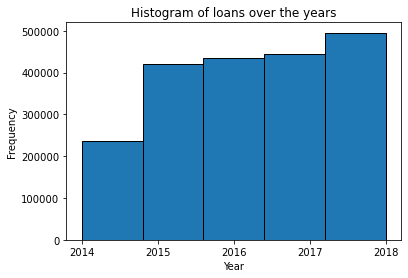

In [17]:
# Plot graph of the number of loans over the years
year_min = accepted['year'].min()
year_max = accepted['year'].max()
year = accepted['year']
plt.hist(year, histtype='bar', bins = 5, align='mid', ec = 'black')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(range(year_min, 2019, 1))
plt.title('Histogram of loans over the years')
plt.show()

### Target Feature

In [18]:
# Look into the statuses used
accepted.loan_status.unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default'], dtype=object)

In [19]:
# Create a value count table for loan status
loan_status = accepted.value_counts(['year', 'loan_status']).sort_index()

In [20]:
# Quick look at the number of loans for each loan status over the years
loan_status

year  loan_status       
2014  Charged Off            41161
      Current                11919
      Default                    1
      Fully Paid            181941
      In Grace Period          200
      Late (16-30 days)         73
      Late (31-120 days)       334
2015  Charged Off            75803
      Current                43299
      Default                    1
      Fully Paid            299742
      In Grace Period          612
      Late (16-30 days)        279
      Late (31-120 days)      1359
2016  Charged Off            68242
      Current               134061
      Default                   10
      Fully Paid            224853
      In Grace Period         1793
      Late (16-30 days)        902
      Late (31-120 days)      4546
2017  Charged Off            39148
      Current               261851
      Default                   21
      Fully Paid            130152
      In Grace Period         2911
      Late (16-30 days)       1492
      Late (31-120 days)      

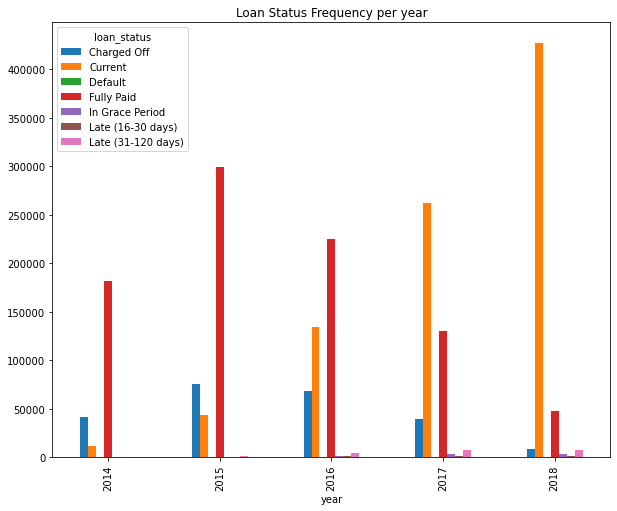

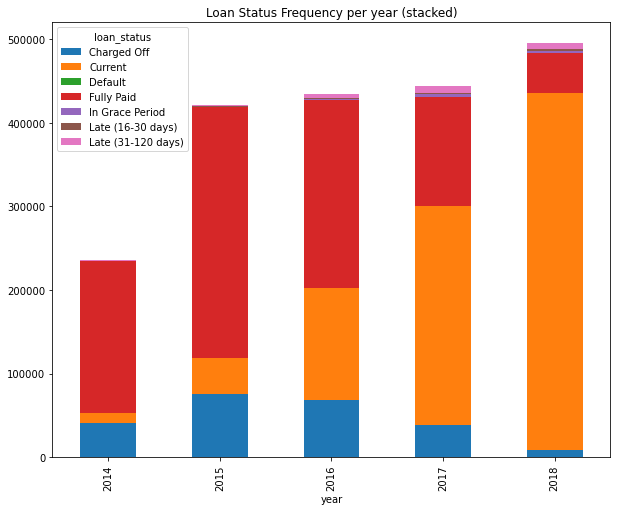

In [21]:
# Visualise the distribution of the loan status
loan_status.unstack().plot(kind='bar', figsize = (10, 8)  #plot a grouped bar chart 
                         , title='Loan Status Frequency per year');

loan_status.unstack().plot(kind='bar', stacked=True, figsize = (10, 8)  #plot a stacked grouped bar chart 
                         , title='Loan Status Frequency per year (stacked)');

As I am looking into loans that have ended, whether they have been defaulted or paid off, I will remove those with a status which are not 'Fully Paid', 'Charged Off' and 'Default'.

In [22]:
# Take out the current loans as the model will be based on known outcomes
accepted = accepted[((accepted['loan_status'] == 'Fully Paid') | (accepted['loan_status'] == 'Charged Off') | (accepted['loan_status'] == 'Default'))]

In [23]:
# To look at the shape of the dataframe after the removal of 'Current' loans
accepted.shape

(1117393, 152)

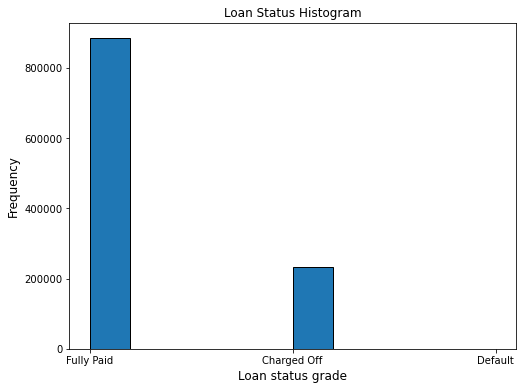

In [24]:
fig, ax = plt.subplots(figsize=(8,6))
data = accepted['loan_status']
# bins = ['Fully Paid', 'Charged Off', 'Deafult']
ax.hist(data, ec="k", align='mid')
ax.set_xlabel('Loan status grade', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.title.set_text('Loan Status Histogram')
plt.show()

In [25]:
# Create mapping for employment length; higher grades are assigned a lower number to reflect lower risk
loan_status_map = {'Default': 1,
              'Charged Off': 1,
              'Fully Paid': 0}

In [26]:
# Apply new grading
accepted = accepted.replace({'loan_status': loan_status_map})

In [27]:
# Create a value count table for loan status post changes
loan_status = accepted.value_counts(['year', 'loan_status'])

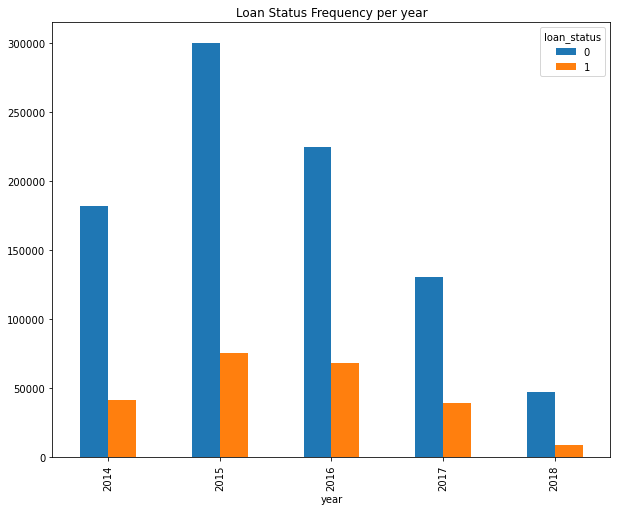

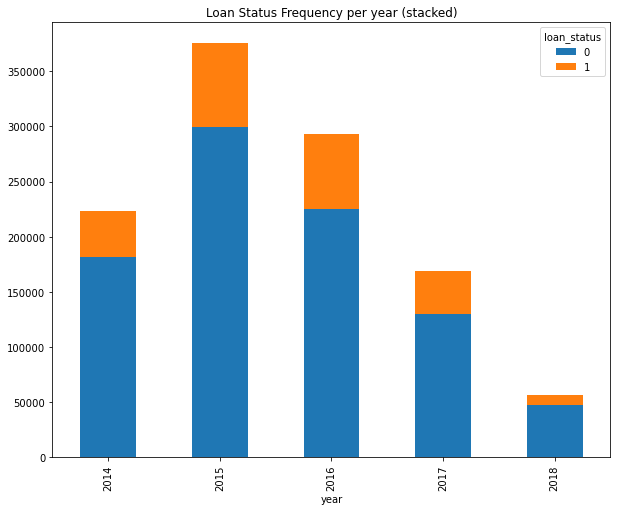

In [28]:
# Visualise the distribution of the loan status after the changes
loan_status.unstack().plot(kind='bar', figsize = (10, 8)  #plot a grouped bar chart 
                         , title='Loan Status Frequency per year');

loan_status.unstack().plot(kind='bar', stacked=True, figsize = (10, 8)  #plot a stacked grouped bar chart 
                         , title='Loan Status Frequency per year (stacked)');

The next few steps would involve reviewing the data to see
* What columns and/or rows should be dropped
    * Too many null values
    * Leak data from future
* Which cell values need to be updated
* Converting ordinal values
* Which rows need to have data imputed

### 'Leaked' data from the future

Based on the descriptions from the given data dictionary, the features in the table below will not be known to an investor/lender as they are retrospective. If they are included in the model, they will expose 'hindsight' information. This will not be in line with the reality of the situation. Hence, they will be dropped from the data.

|   Feature Column                              |   Feature Description                                                                                                                                                                                                                        |
|:----------------------------------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|   acc_now_delinq                              |   The number of accounts on which the borrower is now delinquent.                                                                                                                                                                            |
|   all_util                                    |   Balance to credit limit on all trades                                                                                                                                                                                                      |
|   avg_cur_bal                                 |   Average current balance of all accounts                                                                                                                                                                                                    |
|   chargeoff_within_12_mths                    |   Number of charge-offs within 12 months                                                                                                                                                                                                     |
|   collection_recovery_fee                     |   post charge off collection fee                                                                                                                                                                                                             |
|   collections_12_mths_ex_med                  |   Number of collections in 12 months excluding medical collections                                                                                                                                                                           |
|   debt_settlement_flag                        |   Flags whether or not the borrower, who has charged-off, is working with a debt-settlement company.                                                                                                                                         |
|   debt_settlement_flag_date                   |   The most recent date that the Debt_Settlement_Flag has been set                                                                                                                                                                            |
|   deferral_term                               |   Amount of months that the borrower is expected to pay less than the contractual monthly payment amount due to a hardship plan                                                                                                              |
|   delinq_amnt                                 |   The past-due amount owed for the accounts on which the borrower is now delinquent.                                                                                                                                                         |
|   funded_amnt                                 |   The total amount committed to that loan at that point in time.                                                                                                                                                                             |
|   funded_amnt_inv                             |   The total amount committed by investors for that loan at that point in time.                                                                                                                                                               |
|   hardship_amount                             |   The interest payment that the borrower has committed to make each month while they are on a hardship plan                                                                                                                                  |
|   hardship_dpd                                |   Account days past due as of the hardship plan start date                                                                                                                                                                                   |
|   hardship_end_date                           |   The end date of the hardship plan period                                                                                                                                                                                                   |
|   hardship_flag                               |   Flags whether or not the borrower is on a hardship plan                                                                                                                                                                                    |
|   hardship_last_payment_amount                |   The last payment amount as of the hardship plan start date                                                                                                                                                                                 |
|   hardship_length                             |   The number of months the borrower will make smaller payments than normally obligated due to a hardship plan                                                                                                                                |
|   hardship_loan_status                        |   Loan Status as of the hardship plan start date                                                                                                                                                                                             |
|   hardship_payoff_balance_amount              |   The payoff balance amount as of the hardship plan start date                                                                                                                                                                               |
|   hardship_reason                             |   Describes the reason the hardship plan was offered                                                                                                                                                                                         |
|   hardship_start_date                         |   The start date of the hardship plan period                                                                                                                                                                                                 |
|   hardship_status                             |   Describes if the hardship plan is active, pending, canceled, completed, or broken                                                                                                                                                          |
|   hardship_type                               |   Describes the hardship plan offering                                                                                                                                                                                                       |
|   il_util                                     |   Ratio of total current balance to high credit/credit limit on all install acct                                                                                                                                                             |
|   last_credit_pull_d                          |   The most recent month LC pulled credit for this loan                                                                                                                                                                                       |
|   last_fico_range_high                        |   The upper boundary range the borrower’s last FICO pulled belongs to.                                                                                                                                                                       |
|   last_fico_range_low                         |   The lower boundary range the borrower’s last FICO pulled belongs to.                                                                                                                                                                       |
|   last_pymnt_amnt                             |   Last total payment amount received                                                                                                                                                                                                         |
|   last_pymnt_d                                |   Last month payment was received                                                                                                                                                                                                            |
|   max_bal_bc                                  |   Maximum current balance owed on all revolving accounts                                                                                                                                                                                     |
|   mths_since_rcnt_il                          |   Months since most recent installment accounts opened                                                                                                                                                                                       |
|   mths_since_recent_bc_dlq                    |   Months since most recent bankcard delinquency                                                                                                                                                                                              |
|   mths_since_recent_inq                       |   Months since most recent inquiry.                                                                                                                                                                                                          |
|   mths_since_recent_revol_delinq              |   Months since most recent revolving delinquency.                                                                                                                                                                                            |
|   next_pymnt_d                                |   Next scheduled payment date                                                                                                                                                                                                                |
|   num_accts_ever_120_pd                       |   Number of accounts ever 120 or more days past due                                                                                                                                                                                          |
|   num_tl_120dpd_2m                            |   Number of accounts currently 120 days past due (updated in past 2 months)                                                                                                                                                                  |
|   num_tl_30dpd                                |   Number of accounts currently 30 days past due (updated in past 2 months)                                                                                                                                                                   |
|   num_tl_90g_dpd_24m                          |   Number of accounts 90 or more days past due in last 24 months                                                                                                                                                                              |
|   num_tl_op_past_12m                          |   Number of accounts opened in past 12 months                                                                                                                                                                                                |
|   open_acc_6m                                 |   Number of open trades in last 6 months                                                                                                                                                                                                     |
|   open_act_il                                 |   Number of currently active installment trades                                                                                                                                                                                              |
|   open_il_12m                                 |   Number of installment accounts opened in past 12 months                                                                                                                                                                                    |
|   open_il_24m                                 |   Number of installment accounts opened in past 24 months                                                                                                                                                                                    |
|   open_rv_12m                                 |   Number of revolving trades opened in past 12 months                                                                                                                                                                                        |
|   open_rv_24m                                 |   Number of revolving trades opened in past 24 months                                                                                                                                                                                        |
|   orig_projected_additional_accrued_interest  |   The original projected additional interest amount that will accrue for the given hardship payment plan as of the Hardship Start Date. This field will be null if the borrower has broken their hardship payment plan.                      |
|   out_prncp                                   |   Remaining outstanding principal for total amount funded                                                                                                                                                                                    |
|   out_prncp_inv                               |   Remaining outstanding principal for portion of total amount funded by investors                                                                                                                                                            |
|   payment_plan_start_date                     |   The day the first hardship plan payment is due. For example, if a borrower has a hardship plan period of 3 months, the start date is the start of the three-month period in which the borrower is allowed to make interest-only payments.  |
|   recoveries                                  |   post charge off gross recovery                                                                                                                                                                                                             |
|   settlement_amount                           |   The loan amount that the borrower has agreed to settle for                                                                                                                                                                                 |
|   settlement_date                             |   The date that the borrower agrees to the settlement plan                                                                                                                                                                                   |
|   settlement_percentage                       |   The settlement amount as a percentage of the payoff balance amount on the loan                                                                                                                                                             |
|   settlement_status                           |   The status of the borrower’s settlement plan. Possible values are: COMPLETE, ACTIVE, BROKEN, CANCELLED, DENIED, DRAFT                                                                                                                      |
|   settlement_term                             |   The number of months that the borrower will be on the settlement plan                                                                                                                                                                      |
|   tot_coll_amt                                |   Total collection amounts ever owed                                                                                                                                                                                                         |
|   tot_cur_bal                                 |   Total current balance of all accounts                                                                                                                                                                                                      |
|   total_bal_il                                |   Total current balance of all installment accounts                                                                                                                                                                                          |
|   total_pymnt                                 |   Payments received to date for total amount funded                                                                                                                                                                                          |
|   total_pymnt_inv                             |   Payments received to date for portion of total amount funded by investors                                                                                                                                                                  |
|   total_rec_int                               |   Interest received to date                                                                                                                                                                                                                  |
|   total_rec_late_fee                          |   Late fees received to date                                                                                                                                                                                                                 |
|   total_rec_prncp                             |   Principal received to date                                                                                                                                                                                                                 |
|   total_rev_hi_lim                            |   Total revolving high credit/credit limit                                                                                                                                                                                                   |

In [29]:
hindsight_cols = ['funded_amnt',
'funded_amnt_inv',
'out_prncp',
'out_prncp_inv',
'total_pymnt',
'total_pymnt_inv',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'recoveries',
'collection_recovery_fee',
'last_pymnt_d',
'last_pymnt_amnt',
'next_pymnt_d',
'last_credit_pull_d',
'last_fico_range_high',
'last_fico_range_low',
'collections_12_mths_ex_med',
'acc_now_delinq',
'tot_coll_amt',
'tot_cur_bal',
'open_acc_6m',
'open_act_il',
'open_il_12m',
'open_il_24m',
'mths_since_rcnt_il',
'total_bal_il',
'il_util',
'open_rv_12m',
'open_rv_24m',
'max_bal_bc',
'all_util',
'total_rev_hi_lim',
'avg_cur_bal',
'chargeoff_within_12_mths',
'delinq_amnt',
'mths_since_recent_bc_dlq',
'mths_since_recent_inq',
'mths_since_recent_revol_delinq',
'num_accts_ever_120_pd',
'num_tl_120dpd_2m',
'num_tl_30dpd',
'num_tl_90g_dpd_24m',
'num_tl_op_past_12m',
'hardship_flag',
'hardship_type',
'hardship_reason',
'hardship_status',
'deferral_term',
'hardship_amount',
'hardship_start_date',
'hardship_end_date',
'payment_plan_start_date',
'hardship_length',
'hardship_dpd',
'hardship_loan_status',
'orig_projected_additional_accrued_interest',
'hardship_payoff_balance_amount',
'hardship_last_payment_amount',
'debt_settlement_flag',
'debt_settlement_flag_date',
'settlement_status',
'settlement_date',
'settlement_amount',
'settlement_percentage',
'settlement_term']

In [30]:
# Drop columns deemed to 'leak' future occurence data and unseen to the investor
accepted.drop(columns = hindsight_cols, inplace = True)

In [31]:
# Drop columns with all null values
accepted.dropna(axis = 1, how = 'all', inplace = True)

### Removing columns with a single value
To look at columns that only hold 1 value and remove them as they would not have any effect on the modeling and analysis.

In [32]:
# removing columns with only one unique value 
accepted = accepted.loc[:,accepted.apply(func=pd.Series.nunique, args=(False)) > 1]

### Removing columns that will have no perceived values
The columns are either descriptive of holds 'codes' that have no perceived values on the modeling and analysis.

In [33]:
# Following columns are to be dropped due to no perceived impact
accepted.drop(columns = ['url',
                        'emp_title',
                        'title',
                        'zip_code',
                        'initial_list_status'
                        ],
              inplace = True)

### Delinquencies within the last 2 years
There are a number of rows that have a null value in the columns that reflect the number of months since the last delinquency or major event that triggered a worse rating. This section is to check for such incidents and take them as 1 month as a conservative approach.

In [34]:
# There are a number of rows which have null values for 'mths_since_last_delinq'
# This is to check if these really have no delinquencies
null_mths_delinq = accepted[(accepted['delinq_2yrs'] > 0) & accepted['mths_since_last_delinq'].isnull()]
null_mths_delinq

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,disbursement_method,year
174,68466869,4575.0,36 months,17.27,163.73,D,D3,5 years,RENT,56000.0,Not Verified,2015-12,1,NaN,house,NJ,10.03,1.0,May-2001,665.0,669.0,1.0,NaN,NaN,12.0,0.0,2380.0,27.0,17.0,22.0,Individual,NaN,NaN,NaN,0.0,1.0,2.0,11.0,400.0,71.0,28.0,175.0,5.0,5.0,1.0,12.0,3.0,12.0,5.0,5.0,1.0,12.0,15.0,8.0,12.0,100.0,33.3,0.0,0.0,8900.0,2380.0,1200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2015
259,68566711,4475.0,36 months,16.59,158.64,D,D2,10+ years,RENT,114000.0,Not Verified,2015-12,0,NaN,credit_card,TN,8.36,4.0,Jul-2000,670.0,674.0,2.0,NaN,55.0,5.0,1.0,5153.0,44.0,40.0,9.0,Individual,NaN,NaN,NaN,0.0,0.0,3.0,4.0,3700.0,44.0,132.0,185.0,0.0,0.0,1.0,0.0,3.0,4.0,8.0,11.0,17.0,4.0,22.0,2.0,5.0,80.0,0.0,1.0,0.0,16700.0,8108.0,11100.0,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2015
304,68426444,6425.0,36 months,15.77,225.16,D,D1,1 year,RENT,41000.0,Not Verified,2015-12,0,NaN,debt_consolidation,NJ,2.87,1.0,Mar-2002,670.0,674.0,2.0,NaN,27.0,4.0,1.0,476.0,7.0,13.0,23.0,Individual,NaN,NaN,NaN,1.0,0.0,2.0,4.0,1567.0,10.0,135.0,165.0,5.0,5.0,0.0,12.0,3.0,4.0,4.0,6.0,5.0,4.0,8.0,2.0,4.0,77.0,0.0,1.0,0.0,6700.0,476.0,4700.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2015
325,68466671,14950.0,60 months,18.99,387.73,E,E1,10+ years,MORTGAGE,68000.0,Verified,2015-12,0,NaN,debt_consolidation,WI,31.36,1.0,Jul-2005,685.0,689.0,1.0,NaN,82.0,11.0,1.0,5549.0,57.0,40.0,23.0,Individual,NaN,NaN,NaN,0.0,1.0,2.0,8.0,2167.0,62.0,117.0,125.0,4.0,3.0,2.0,6.0,3.0,5.0,5.0,5.0,27.0,5.0,11.0,4.0,11.0,100.0,33.3,1.0,0.0,138722.0,85740.0,6500.0,94022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2015
434,68486912,10000.0,36 months,13.44,339.07,C,C3,3 years,RENT,80000.0,Not Verified,2015-12,0,NaN,credit_card,CT,15.56,1.0,Aug-2003,670.0,674.0,1.0,NaN,38.0,9.0,1.0,8297.0,57.0,24.0,7.0,Individual,NaN,NaN,NaN,0.0,1.0,4.0,8.0,4500.0,75.0,148.0,114.0,0.0,0.0,3.0,10.0,2.0,7.0,2.0,3.0,8.0,7.0,12.0,5.0,9.0,79.0,50.0,1.0,0.0,54793.0,47467.0,9000.0,40243.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242343,91595267,6050.0,36 months,14.99,209.70,C,C4,4 years,MORTGAGE,35000.0,Not Verified,2016-10,0,NaN,debt_consolidation,CA,17.22,1.0,Feb-1995,675.0,679.0,1.0,NaN,NaN,13.0,0.0,8104.0,66.0,16.0,18.0,Individual,NaN,NaN,NaN,1.0,1.0,3.0,3.0,1200.0,82.0,120.0,260.0,1.0,1.0,1.0,1.0,4.0,11.0,4.0,4.0,2.0,11.0,13.0,9.0,13.0,94.0,75.0,0.0,0.0,137174.0,10610.0,4800.0,3875.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [35]:
# There are a number of rows which have null values for 'mths_since_last_major_derog'
# This is to check if these really have no delinquencies
null_mths_delinq = accepted[(accepted['delinq_2yrs'] > 0) & accepted['mths_since_last_major_derog'].isnull()]
null_mths_delinq

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,disbursement_method,year
1,68355089,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,65000.0,Not Verified,2015-12,0,NaN,small_business,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,6.0,4.0,57830.0,27.1,113.0,192.0,2.0,2.0,4.0,2.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2015
4,68476807,10400.0,60 months,22.45,289.91,F,F1,3 years,MORTGAGE,104433.0,Source Verified,2015-12,0,NaN,major_purchase,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,NaN,Individual,NaN,NaN,NaN,2.0,1.0,3.0,10.0,4567.0,77.5,128.0,210.0,4.0,4.0,6.0,4.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2015
24,68476715,6000.0,36 months,7.49,186.61,A,A4,10+ years,MORTGAGE,100000.0,Not Verified,2015-12,0,NaN,debt_consolidation,TX,13.28,1.0,May-1994,695.0,699.0,1.0,15.0,NaN,9.0,0.0,8563.0,72.0,16.0,NaN,Individual,NaN,NaN,NaN,0.0,1.0,1.0,1.0,437.0,88.5,124.0,259.0,18.0,18.0,2.0,36.0,2.0,4.0,2.0,6.0,4.0,5.0,9.0,4.0,9.0,93.7,50.0,0.0,0.0,156354.0,22741.0,3800.0,36083.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2015
25,67849662,4225.0,36 months,14.85,146.16,C,C5,5 years,RENT,35000.0,Source Verified,2015-12,1,NaN,debt_consolidation,KS,15.22,2.0,Jul-2011,725.0,729.0,0.0,18.0,NaN,6.0,0.0,1058.0,24.6,6.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2233.0,14.1,47.0,53.0,26.0,26.0,0.0,26.0,1.0,2.0,3.0,3.0,1.0,5.0,5.0,2.0,6.0,66.7,0.0,0.0,0.0,21822.0,4888.0,2600.0,17522.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2015
35,68446769,7000.0,36 months,7.49,217.72,A,A4,10+ years,MORTGAGE,59000.0,Not Verified,2015-12,0,NaN,credit_card,MD,13.06,1.0,Oct-1996,730.0,734.0,1.0,23.0,NaN,10.0,0.0,10467.0,24.2,34.0,NaN,Individual,NaN,NaN,NaN,0.0,2.0,2.0,2.0,26118.0,26.0,124.0,223.0,10.0,10.0,3.0,34.0,2.0,4.0,4.0,5.0,14.0,8.0,17.0,4.0,10.0,97.1,0.0,0.0,0.0,115502.0,15804.0,35300.0,20402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260636,90245482,24000.0,60 months,12.79,543.50,C,C1,5 years,RENT,62000.0,Not Verified,2016-10,1,NaN,debt_consolidation,CA,14.46,1.0,Feb-2004,675.0,679.0,1.0,17.0,NaN,12.0,0.0,6780.0,34.1,22.0,NaN,Individual,NaN,NaN,NaN,1.0,0.0,2.0,3.0,11820.0,36.5,14.0,151.0,21.0,13.0,0.0,29.0,7.0,7.0,9.0,14.0,2.0,11.0,20.0,7.0,12.0,90.9,25.0,0.0,0.0,34900.0,17516.0,18600.

In [36]:
# As there are rows with 'mths_since_last_delinq' as null values but do have delinquencies in the last 2 years;
# taking a conservative approach, a 1 month value will be assigned for those with mths_since_last_delinq' as 
# null values but do have delinquencies in the last 2 years
accepted.loc[(accepted['delinq_2yrs'] > 0) & accepted['mths_since_last_delinq'].isnull(), 'mths_since_last_delinq'] = 1

In [37]:
# Check that changes have been effected
null_mths_delinq = accepted[(accepted['delinq_2yrs'] > 0) & accepted['mths_since_last_delinq'].isnull()]
null_mths_delinq

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,disbursement_method,year


In [38]:
# As delinquencies in the last 2 years might affect the rating of the borrower, taking a conservative approach,
# a 1 month value will be assigned for those with 'mths_since_last_major_derog' as 
# null values but do have delinquencies in the last 2 years
accepted.loc[(accepted['delinq_2yrs'] > 0) & accepted['mths_since_last_major_derog'].isnull(), 'mths_since_last_major_derog'] = 1

In [39]:
# Check that changes have been effected
null_mths_major_derog = accepted[(accepted['delinq_2yrs'] > 0) & accepted['mths_since_last_major_derog'].isnull()]
null_mths_major_derog

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,disbursement_method,year


### DTI
According to the data dictionary, the 'dti' is:  
_A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income._  
And the 'dti_joint' is:
_A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income._

As there are a number of rows with null values in the columns, I will check if there are any rows with null values in both columns as this might affect the ability to pay by the borrower.

In [40]:
null_dti = accepted[accepted['dti'].isnull() & accepted['dti_joint'].isnull()]
null_dti

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,disbursement_method,year


As seen, there are no rows in which have null value in both columns. Hence, in a later section, will take a aggregate of both.

### Updating null values
Based on the definitions, the columns will be taken as zero for those with null values.

In [41]:
# Replace null values as zeroes
accepted[['dti',
          'inq_last_6mths',
          'mths_since_last_record',
          'mths_since_last_delinq',
          'mths_since_last_major_derog',
          'revol_util',
          'annual_inc_joint',
          'dti_joint',
          'inq_fi',
          'total_cu_tl',
          'inq_last_12m',
          'bc_open_to_buy',
          'bc_util',
          'mo_sin_old_il_acct',
          'mths_since_recent_bc',
          'num_rev_accts',
          'pct_tl_nvr_dlq',
          'percent_bc_gt_75']] = accepted[['dti',
          'inq_last_6mths',
          'mths_since_last_record',
          'mths_since_last_delinq',
          'mths_since_last_major_derog',
          'revol_util',
          'annual_inc_joint',
          'dti_joint',
          'inq_fi',
          'total_cu_tl',
          'inq_last_12m',
          'bc_open_to_buy',
          'bc_util',
          'mo_sin_old_il_acct',
          'mths_since_recent_bc',
          'num_rev_accts',
          'pct_tl_nvr_dlq',
          'percent_bc_gt_75']].fillna(0)

### Drop columns
There are a few columns with a number null values. Taking 80% as a benchmark, those with 80% and more of null values will be removed.

In [42]:
# List down columns which have more than 80% of null values
null_col = accepted.columns[accepted.isnull().mean() >= 0.8] # Get a list of columns which have more than 80% null
len(null_col) # Get the number of columns from the list to compare against before and after shape

15

In [43]:
# Current shape of data before dopping columns
accepted.shape

(1117393, 78)

In [44]:
# Drop columns based on the list in null_col, which are those with more than 80% null values
accepted.drop(columns = null_col, inplace = True)

In [45]:
# Current shape of data after dopping columns
accepted.shape

(1117393, 63)

In [46]:
accepted.isnull().sum()

id                                 0
loan_amnt                          0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_length                     69551
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
purpose                            0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
fico_range_low                     0
fico_range_high                    0
inq_last_6mths                     0
mths_since_last_delinq             0
mths_since_last_record             0
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                         0
t

### Employment Length
Employment length will need to be amended as it is considered an object datatype. Steps will be taken to explore the values and subsequently amend them to reflect the length of employment by the borrower.

In [47]:
# List down all the employment length values
accepted.emp_length.unique()

array(['10+ years', '3 years', '4 years', '6 years', '7 years', '8 years',
       '2 years', '5 years', '9 years', '< 1 year', '1 year', nan],
      dtype=object)

In [48]:
# Create mapping for employment length
emp_length_dict = {'10+ years': 10,
                   '9 years': 9,
                   '8 years': 8,
                   '7 years': 7,
                   '6 years': 6,
                   '5 years': 5,
                   '4 years': 4,
                   '3 years': 3,
                   '2 years': 2,
                   '1 year': 1,
                   '< 1 year': 0}

In [49]:
# Map values to dictionary for employment length to convert to 
accepted = accepted.replace({'emp_length': emp_length_dict})

In [50]:
# Assuming that those with null values under employment leangth as 0, for a conservative approach
accepted['emp_length'] = accepted['emp_length'].fillna(0)

In [51]:
# This is to remove the spaces and the word 'months' from the 'term' column
accepted['term'] = accepted['term'].str.replace(' ', '')
accepted['term'] = accepted['term'].str.replace('months', '')
accepted['term'] = accepted['term'].astype('float64')

### Consolidate for income and dti columns
These represent income type of data. 'annual_inc' and 'annual_inc_joint' shows the annual income for individual and joint/co borrowers. Similarly for 'dti' and 'dti_joint' as well. They will be aggregated and taken as 'total_inc_consol' and 'total_dti_consol'.

In [52]:
# To consolidate the total annual income to so as to assess income as a whole in the model
accepted['total_inc_consol'] = accepted['annual_inc'] + accepted['annual_inc_joint']
accepted.drop(columns = ['annual_inc', 'annual_inc_joint'], inplace = True)

In [53]:
# To consolidate the total annual income to so as to assess dti as a whole in the model
accepted['total_dti_consol'] = accepted['dti'] + accepted['dti_joint']
accepted.drop(columns = ['dti', 'dti_joint'], inplace = True)

### Conversion of grades to a numerals
The grades, assigned by The Lending Club, will be converted to numerals with A as 1 and G as 7. The higher the number, the higher the the risk involved with the particular loan.

In [54]:
# Look at the values in grade and sub_grade columns
print(sorted(accepted['grade'].unique()))
print(sorted(accepted['sub_grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']
['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


In [55]:
# Create mapping for employment length; higher grades are assigned a lower number to reflect lower risk
grade_dict = {'G': 7,
              'F': 6,
              'E': 5,
              'D': 4,
              'C': 3,
              'B': 2,
              'A': 1}

In [56]:
# Apply the risk grading dictionary
accepted = accepted.replace({'grade': grade_dict})

In [57]:
# Create new sub grade, concatenating the grade in digits and the last digit of the sub grade
accepted['sub_grade_d'] = accepted['grade'].astype(str) + accepted['sub_grade'].str.strip().str[-1]
accepted['sub_grade_d'] = accepted['sub_grade_d'].astype('int64')

In [58]:
# Check that changes ahve been effected
accepted.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,application_type,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,year,total_inc_consol,total_dti_consol,sub_grade_d
0,68407277,3600.0,36.0,13.99,123.03,3,C4,10.0,MORTGAGE,Not Verified,2015-12,0,debt_consolidation,PA,0.0,Aug-2003,675.0,679.0,1.0,30.0,0.0,7.0,0.0,2765.0,29.7,13.0,30.0,Individual,3.0,1.0,4.0,4.0,1506.0,37.2,148.0,128.0,3.0,3.0,1.0,4.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,Cash,2015,55000.0,5.91,34
1,68355089,24700.0,36.0,11.99,820.28,3,C1,10.0,MORTGAGE,Not Verified,2015-12,0,small_business,SD,1.0,Dec-1999,715.0,719.0,4.0,6.0,0.0,22.0,0.0,21470.0,19.2,38.0,1.0,Individual,0.0,0.0,6.0,4.0,57830.0,27.1,113.0,192.0,2.0,2.0,4.0,2.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,Cash,2015,65000.0,16.06,31
2,68341763,20000.0,60.0,10.78,432.66,2,B4,10.0,MORTGAGE,Not Verified,2015-12,0,home_improvement,IL,0.0,Aug-2000,695.0,699.0,0.0,0.0,0.0,6.0,0.0,7869.0,56.2,18.0,0.0,Joint App,2.0,5.0,1.0,6.0,2737.0,55.9,125.0,184.0,14.0,14.0,5.0,101.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,Cash,2015,134000.0,24.63,24
4,68476807,10400.0,60.0,22.45,289.91,6,F1,3.0,MORTGAGE,Source Verified,2015-12,0,major_purchase,PA,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,12.0,0.0,21929.0,64.5,35.0,1.0,Individual,2.0,1.0,3.0,10.0,4567.0,77.5,128.0,210.0,4.0,4.0,6.0,4.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,Cash,2015,104433.0,25.37,61
5,68426831,11950.0,36.0,13.44,405.18,3,C3,4.0,RENT,Source Verified,2015-12,0,debt_consolidation,GA,0.0,Oct-1987,690.0,694.0,0.0,0.0,0.0,5.0,0.0,8822.0,68.4,6.0,0.0,Individual,0.0,0.0,0.0,0.0,844.0,91.0,338.0,54.0,32.0,32.0,0.0,36.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,Cash,2015,34000.0,10.20,33


In [59]:
# Drop 'sub_grade' after feature engineering
accepted.drop(columns = ['sub_grade'], inplace = True)

In [60]:
# Check on the datatype of the 2 features
accepted[['grade', 'sub_grade_d']].dtypes

grade          int64
sub_grade_d    int64
dtype: object

### Age of oldest credit line
As the age of the credit line might have an impact on credit worthiness of the borrower, a feature will be engineered to get the how old the credit line is as of the issue date.

In [61]:
# Change the format of the earliest_cr_line column to a date time format
accepted['earliest_cr_line'] = pd.to_datetime(accepted['earliest_cr_line'])
accepted['earliest_cr_line'] = accepted.earliest_cr_line.dt.to_period('m')

In [62]:
# Get the estimated age of the oldest credit line
accepted['est_age_cr_line'] = accepted.issue_d - accepted.earliest_cr_line

In [63]:
# Drop 'earliest_cr_line' after feature engineering
accepted.drop(columns = ['earliest_cr_line'], inplace = True)

In [64]:
# Look at the data of column created
accepted.est_age_cr_line.head()

0    <148 * MonthEnds>
1    <192 * MonthEnds>
2    <184 * MonthEnds>
4    <210 * MonthEnds>
5    <338 * MonthEnds>
Name: est_age_cr_line, dtype: object

In [65]:
# Conversion for regex
accepted['est_age_cr_line'] = accepted['est_age_cr_line'].astype(str)

In [66]:
# Create functions to remove the spaces, special characters and the word 'Monthends'
def remove_spchar(x):
    return re.sub('[\W]','',x) #removes special chracters and spaces

def remove_months(x):
    return re.sub('MonthEnds','',x) #removes the word MonthEnds

In [67]:
# Apply functions
accepted['est_age_cr_line'] = accepted['est_age_cr_line'].map(remove_spchar)
accepted['est_age_cr_line'] = accepted['est_age_cr_line'].map(remove_months)

In [68]:
# Convert to integers after removing unwanted characters
accepted['est_age_cr_line'] = accepted['est_age_cr_line'].astype('int')

In [69]:
# Look at the data of column after the changes
accepted['est_age_cr_line'].head()

0    148
1    192
2    184
4    210
5    338
Name: est_age_cr_line, dtype: int64

## Fico
According to the data dictionary, the description for,  
fico_range_high: _The upper boundary range the borrower’s FICO at loan origination belongs to_.

fico_range_low: _The lower boundary range the borrower’s FICO at loan origination belongs to_.  

Will take the median of the Fico scores of the borrowers and take it as the Fico score for the borrower

In [70]:
# Create new column that takes the median of the Fico scores
accepted['fico_median'] = accepted[['fico_range_low','fico_range_high']].median(axis=1)

In [71]:
accepted[['fico_range_low','fico_range_high', 'fico_median']].head()

,fico_range_low,fico_range_high,fico_median
0,675.0,679.0,677.0
1,715.0,719.0,717.0
2,695.0,699.0,697.0
4,695.0,699.0,697.0
5,690.0,694.0,692.0


In [72]:
# Drop 'fico_range_low','fico_range_high' after feature engineering
accepted.drop(columns = ['fico_range_low','fico_range_high'], inplace = True)

## Object datatypes
Will look at the values contained in the columns with 'object' datatypes.

In [73]:
# Get list of 
object_col = accepted.select_dtypes('object').columns
object_col

Index(['id', 'home_ownership', 'verification_status', 'purpose', 'addr_state',
       'application_type', 'disbursement_method'],
      dtype='object')

In [74]:
accepted.home_ownership.unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE'], dtype=object)

In [75]:
accepted.verification_status.unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [76]:
accepted.purpose.unique()

array(['debt_consolidation', 'small_business', 'home_improvement',
       'major_purchase', 'credit_card', 'other', 'house', 'vacation',
       'car', 'medical', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [77]:
accepted.application_type.unique()

array(['Individual', 'Joint App'], dtype=object)

In [78]:
accepted.disbursement_method.unique()

array(['Cash', 'DirectPay'], dtype=object)

In [79]:
accepted.select_dtypes('object').columns

Index(['id', 'home_ownership', 'verification_status', 'purpose', 'addr_state',
       'application_type', 'disbursement_method'],
      dtype='object')

### Assigning regions in the US based on 'addr_state'
Some states can get effected by the situation in neighbouring states, it would also be easier to group the states together.

In [80]:
# Define regions in the United States
region_dict = {'west' : ['CA', 'OR', 'NV', 'WA', 'ID', 'UT', 'AZ', 'NM', 'CO', 'WY', 'MT', 'AK','HI'],
               'midwest' : ['MD', 'MN', 'WY', 'SD', 'NE', 'KS', 'MO', 'IA', 'WI', 'IL', 'MI', 'IN', 'OH'],
               'northeast' : ['ME', 'NH', 'VT', 'PA', 'CT', 'NY', 'MA', 'CT', 'NJ', 'RI'],
               'south' : ['TX', 'OK', 'AR', 'LA', 'MS', 'AL', 'TN', 'KY', 'GA', 'FL', 'SC', 'NC', 'VA', 'WV', 'DC', 'MD', 'DE']}

accepted['region'] = accepted.addr_state.map({item: k for k, v in region_dict.items() for item in v})

In [81]:
accepted['region'].unique()

array(['northeast', 'midwest', 'south', 'west', nan], dtype=object)

## Train-Validation-Test Set
The data will be split into 3 sets. Firstly, the data will be split

In [82]:
# Create test dataset
test = accepted[accepted['issue_d'].dt.year > 2016]

In [83]:
# Check the latest date in the test data
test.issue_d.max()

Period('2018-12', 'M')

In [84]:
# Check the earliest date in the test data
test.issue_d.min()

Period('2017-01', 'M')

In [85]:
test.shape

(225639, 61)

In [86]:
# Create train dataset
train = accepted[accepted['issue_d'].dt.year < 2017]

In [87]:
# Check the latest date in the train data
train.issue_d.max()

Period('2016-12', 'M')

In [88]:
# Check the earliest date in the train data
train.issue_d.min()

Period('2014-01', 'M')

In [89]:
train.shape

(891754, 61)

In [90]:
accepted.shape

(1117393, 61)

The split of the data between train and test is 78.3% to 21.7% which is around the optimal 'rule-of thumb' split.

In [91]:
#Save out updated dataframes to csv file
train.to_csv('../datasets/train_1.csv',index=False)
test.to_csv('../datasets/test_1.csv',index=False)